In [1]:
from pylab import *
mpl.rcParams.update({'figure.figsize': (11.0, 7.0), 'font.size': 18,})

In [2]:
B_Si = (7.3e15)**2 #1.08e31  # K^-3 cm^-6
Eg_Si = 1.12    # eV  (=1.602 x 10-19 J)
KB = 8.62e-5    # eV / K

def ni2(T, B=B_Si, Eg=Eg_Si):
    return B * T**3 * exp(-Eg / (KB * T))


In [3]:

def ann_temp(T=25, text='Room temp'):
    """Helper to add an arrow to room temperature."""
    ax = gca()
    x,y = (T, sqrt(ni2(T+273.15)))
    plot(x, y, 'o')
    ax.annotate(text, xy=(x,y), xytext=(x, y/5),
                arrowprops=dict(arrowstyle='->',))

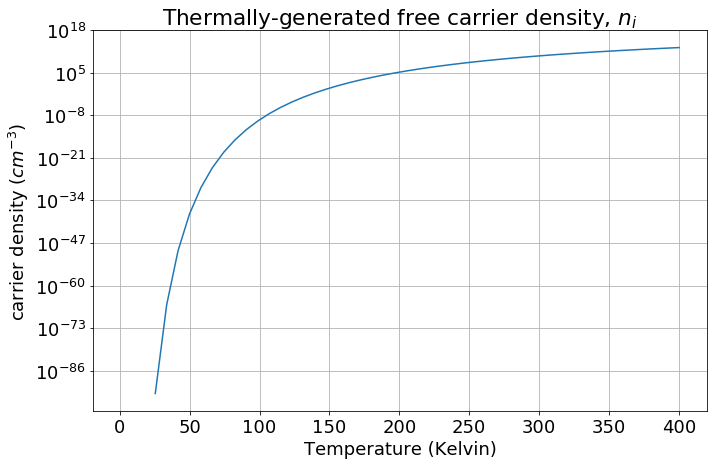

In [4]:
tempK = linspace(1, 400)

semilogy(tempK, sqrt(ni2(tempK)))
title('Thermally-generated free carrier density, $n_i$')
#hlines(5e22, tempK.min(), tempK.max(), 'r')
ylabel('carrier density ($cm^{-3}$)')
xlabel('Temperature (Kelvin)')
grid('on')
show()

For a non-bogus formula, we need to get $n_i = 0$ at $T=0\,K$.

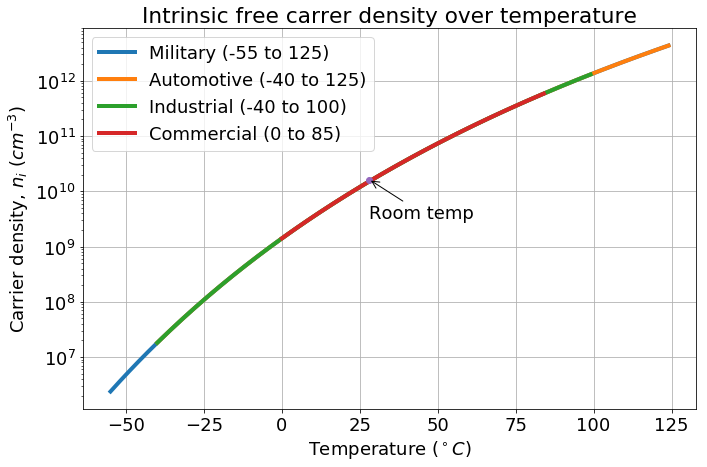

In [5]:
commercial =(0, 85)
industrial = (-40, 100)
automotive = (-40, 125)
military = (-55, 125)


close('all')

for tr,name in ((military, 'Military'),
                (automotive, 'Automotive'),
                (industrial, 'Industrial'),
                (commercial, 'Commercial'),):
    tempC = arange(tr[0], tr[1], 1)
    tempK = tempC + 272.15
    
    semilogy(tempC, sqrt(ni2(tempK)),
             label='%s (%i to %i)' % (name, tr[0], tr[1]),
             linewidth=4)

legend(loc='upper left')


ann_temp(300-272)

ylabel('Carrier density, $n_i$ ($cm^{-3}$)')
xlabel('Temperature ($^\circ C$)')
title('Intrinsic free carrer density over temperature')
grid('on')
show()

## THIS IS A HUGE RANGE !!!

## ... and plain huge numbers
How do they compare to the number of atoms in the crystal?

In [6]:
#
# hw02 question 1
#
print(' T    n #/cm3   fraction free')
print('---|----------|---------------')
for t in (-55, 0, 20, 75, 125):
    n = sqrt(ni2(t+273.15))
    print('%3i  %0.2e  %.02e' % (t, n, n/5e22))

 T    n #/cm3   fraction free
---|----------|---------------
-55  2.74e+06  5.48e-17
  0  1.54e+09  3.09e-14
 20  8.70e+09  1.74e-13
 75  3.73e+11  7.46e-12
125  4.75e+12  9.51e-11


so, even at $125^\circ C$, only $1$ atom in $10^{10}$ is contributing a free electron.  In this context, the numbers are pretty remarkable that such a small fraction of free electrons are responsible for all of semiconductor operation!

In [9]:
#
# hw02 question 2
#
B_GaAs = (3.56e14)**2  # B or B^2 depends on which formula you are using! -> check!
Eg_GaAs = 1.42

ni = sqrt(ni2(300, B=B_GaAs, Eg=Eg_GaAs))
print('%.3g (cm^-3)' % ni)

2.2e+06 (cm^-3)
